In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("insurance_dataset.csv")

In [3]:
data.isnull().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

# Data Preprocessing

In [4]:
print(data['medical_history'].unique())

['Diabetes' nan 'High blood pressure' 'Heart disease']


In [5]:
print(data['family_medical_history'].unique())

[nan 'High blood pressure' 'Diabetes' 'Heart disease']


In [6]:
data.fillna('Normal', inplace = True)

In [7]:
# creating bins for ages

bin_age = [10,19,29,39,49,59,69]
lables_age = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']

data['age_group'] = pd.cut(data['age'], bins = bin_age, labels = lables_age, right = True)

data = data.drop('age', axis = True)

In [8]:
# creating bins for BMI
bins_bmi = [0,18.5, 24.9,29.9,39.9,50.9]
lable_bmi = ['underweight','normal weight', 'overweight', 'obesity', 'severe obesity']

data['BMI_group'] = pd.cut(data['bmi'], bins = bins_bmi, labels = lable_bmi, right = True)

data = data.drop('bmi', axis = True)

In [9]:
# reording the columns

In [10]:
new_column_order = ['gender','age_group', 'BMI_group', 'children', 'smoker', 'region', 'medical_history',
       'family_medical_history', 'exercise_frequency', 'occupation',
       'coverage_level', 'charges']

In [11]:
data = data[new_column_order]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   gender                  1000000 non-null  object  
 1   age_group               1000000 non-null  category
 2   BMI_group               1000000 non-null  category
 3   children                1000000 non-null  int64   
 4   smoker                  1000000 non-null  object  
 5   region                  1000000 non-null  object  
 6   medical_history         1000000 non-null  object  
 7   family_medical_history  1000000 non-null  object  
 8   exercise_frequency      1000000 non-null  object  
 9   occupation              1000000 non-null  object  
 10  coverage_level          1000000 non-null  object  
 11  charges                 1000000 non-null  float64 
dtypes: category(2), float64(1), int64(1), object(8)
memory usage: 78.2+ MB


# Data visulaization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


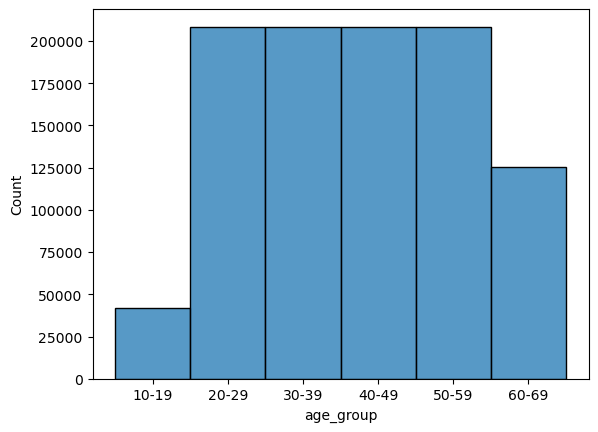

In [13]:
sns.histplot(data['age_group'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


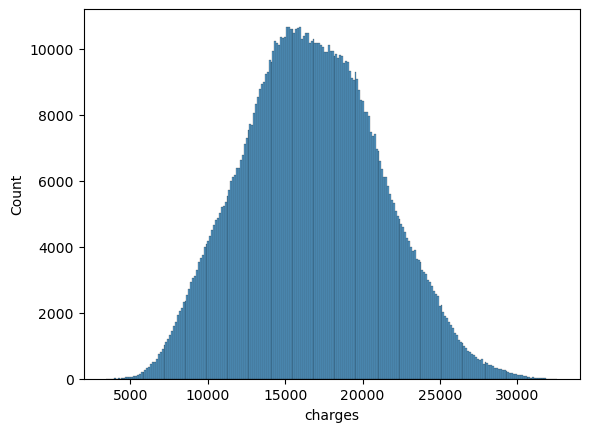

In [14]:
sns.histplot(data['charges'])
plt.show()

/var/folders/py/kzrghxss26z3qgjp6dp61_lc0000gn/T/ipykernel_20832/1368552815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_charges = data.groupby('age_group')['charges'].mean().reset_index()
/var/folders/py/kzrghxss26z3qgjp6dp61_lc0000gn/T/ipykernel_20832/1368552815.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age_group', y='charges', data=age_group_charges, palette='viridis')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_i

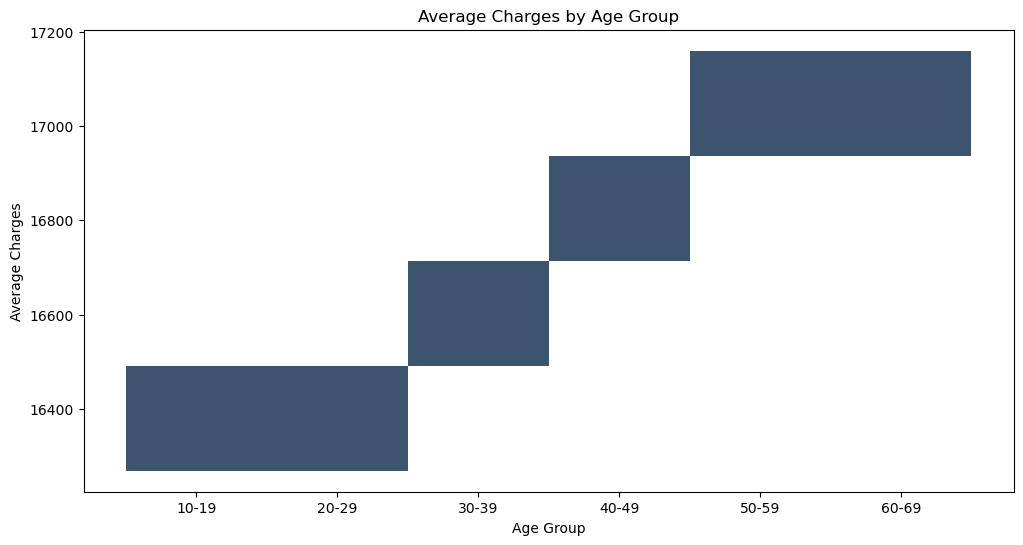

In [15]:
age_group_charges = data.groupby('age_group')['charges'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.histplot(x='age_group', y='charges', data=age_group_charges, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Group')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


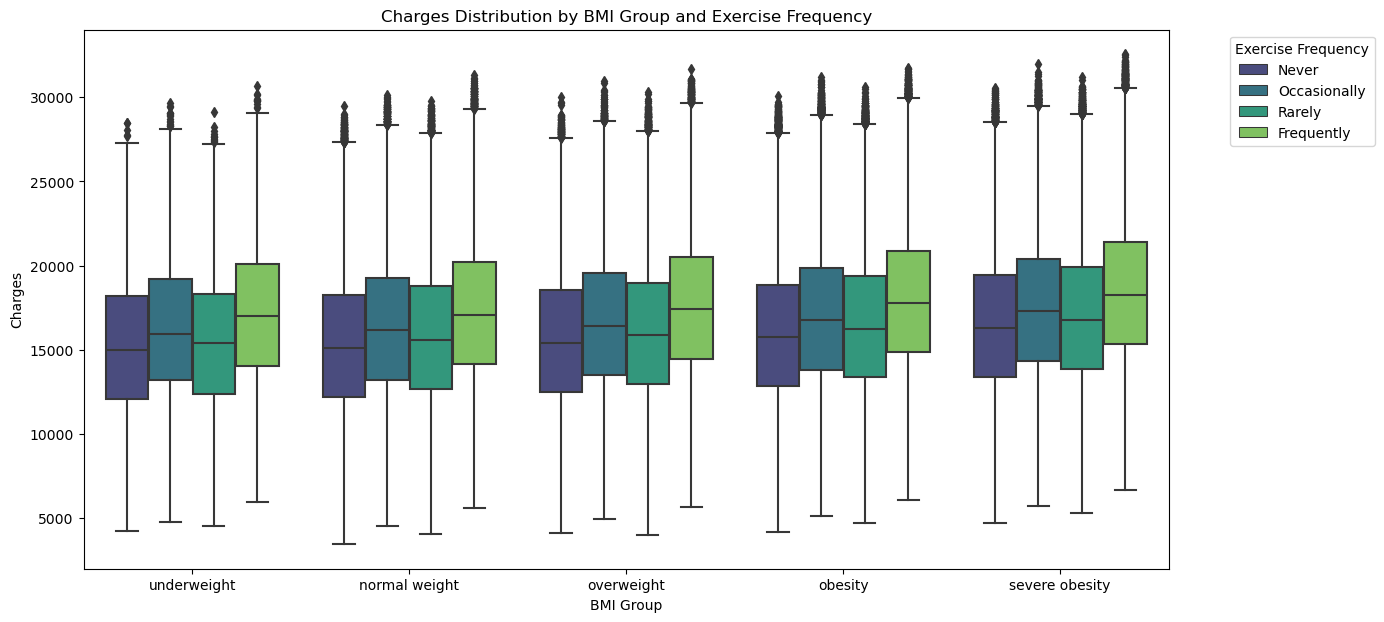

In [16]:
# Plotting the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='BMI_group', y='charges', hue='exercise_frequency', data=data, palette='viridis')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.title('Charges Distribution by BMI Group and Exercise Frequency')
plt.legend(title='Exercise Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

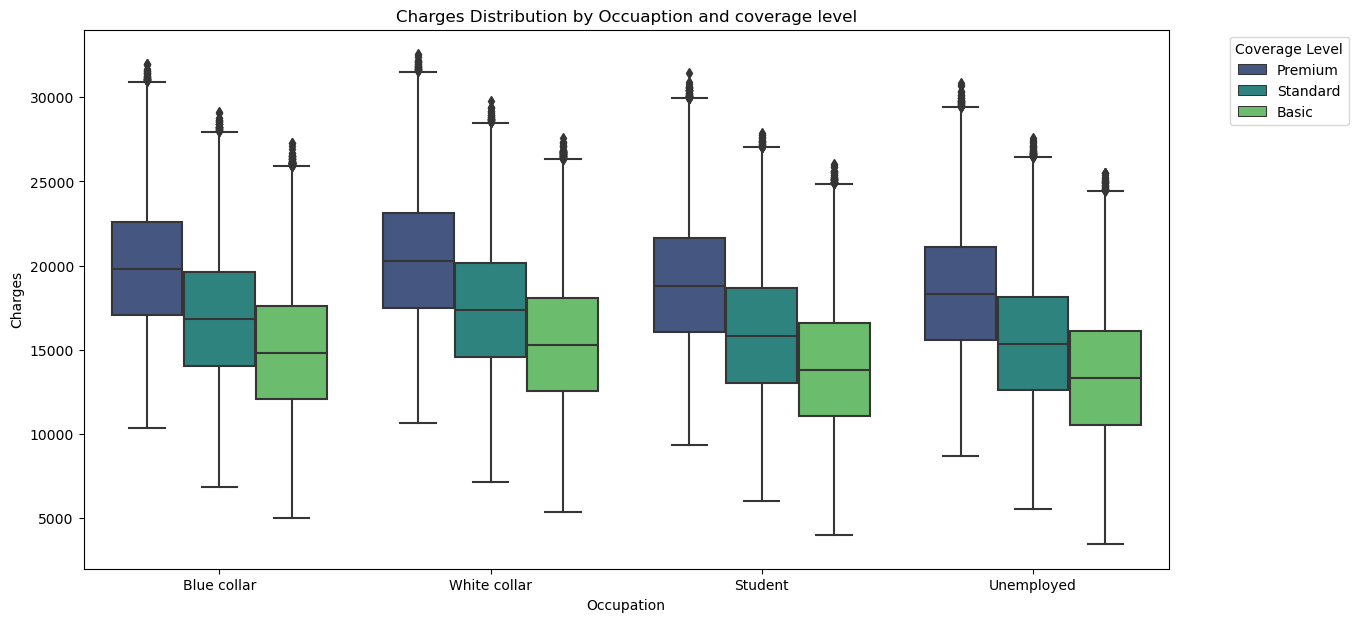

In [17]:
plt.figure(figsize=(14,7))
sns.boxplot(x='occupation', y = 'charges', hue='coverage_level', data = data, palette = 'viridis')
plt.xlabel('Occupation')
plt.ylabel('Charges')
plt.title('Charges Distribution by Occuaption and coverage level')
plt.legend(title='Coverage Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.show()

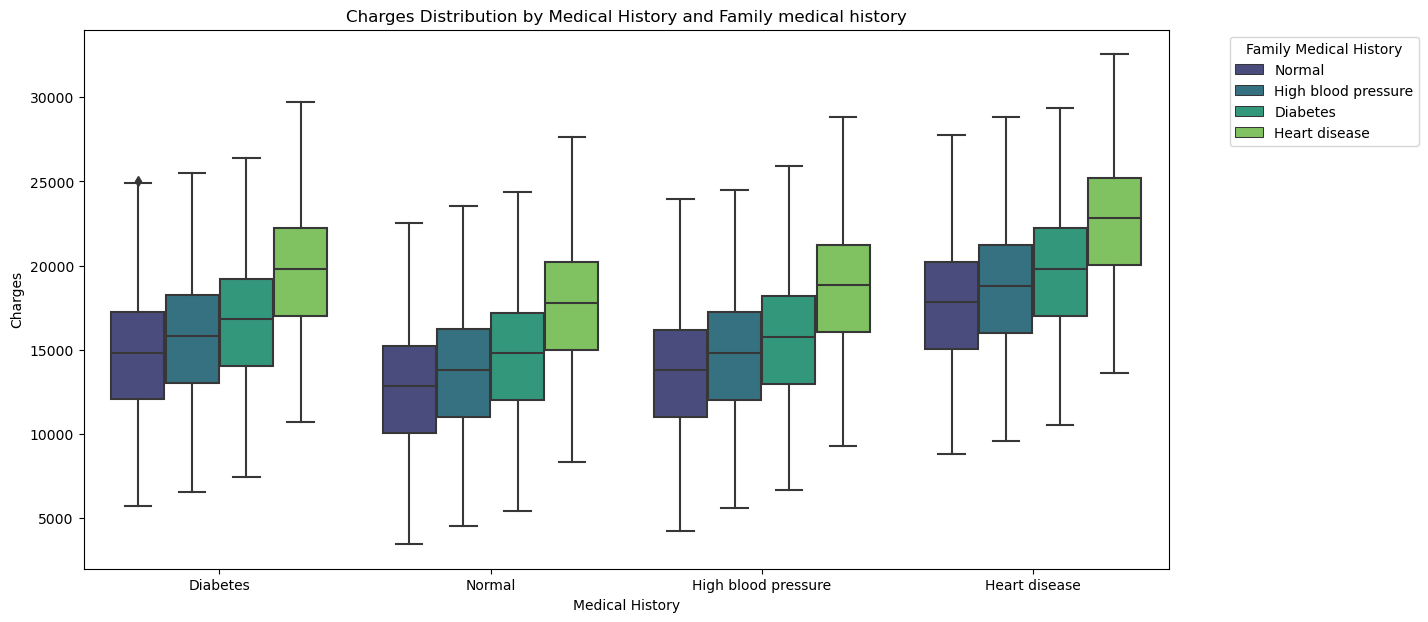

In [18]:
plt.figure(figsize=(14,7))
sns.boxplot(x='medical_history', y = 'charges', hue='family_medical_history', data = data, palette = 'viridis')
plt.xlabel('Medical History')
plt.ylabel('Charges')
plt.title('Charges Distribution by Medical History and Family medical history')
plt.legend(title='Family Medical History', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

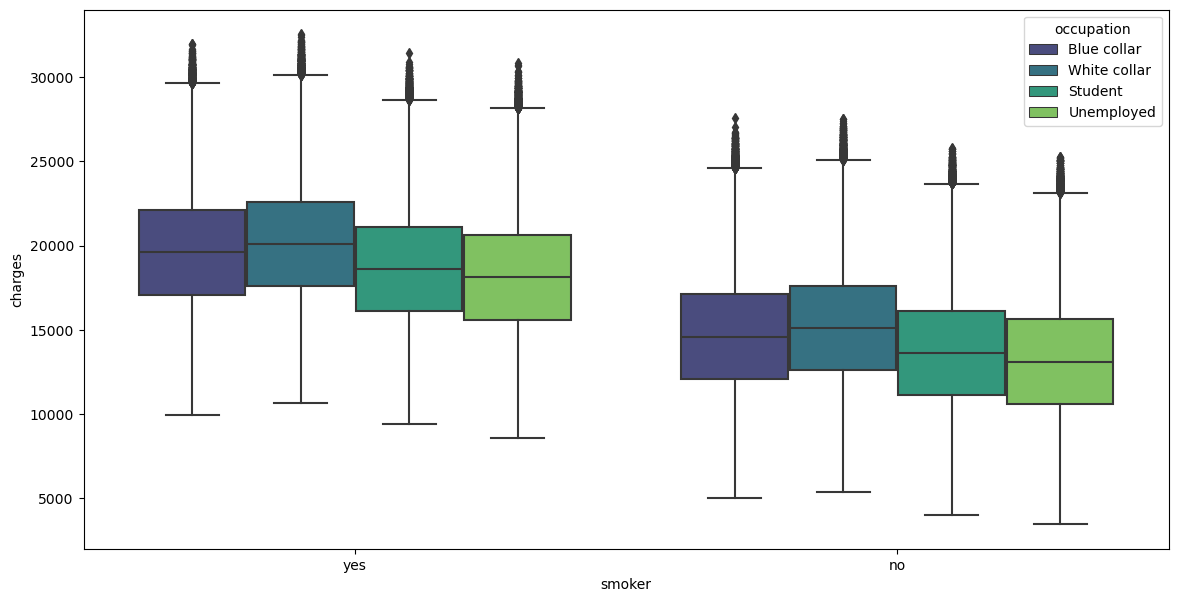

In [19]:
plt.figure(figsize=(14,7))
sns.boxplot(data = data, x = 'smoker', y = 'charges', hue = 'occupation',palette = 'viridis')
plt.show()

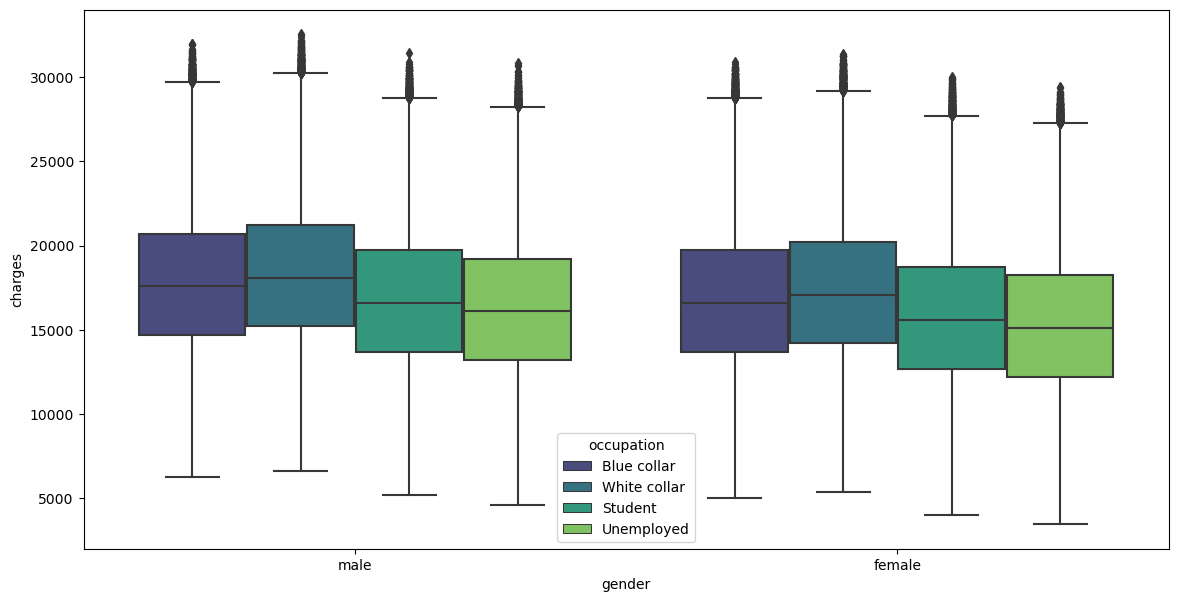

In [20]:
plt.figure(figsize=(14,7))
sns.boxplot(data = data, x = 'gender', y = 'charges', hue = 'occupation',palette = 'viridis')
plt.show()

# Linear regression

In [21]:
def cate(data, ignore):
    for cate in data.columns:
        if cate not in ignore:
            data[cate] = data[cate].astype('category')
    return data    

In [22]:
ignore_columns = ('age_group', 'BMI group', 'charges')
data_enc = cate(data, ignore_columns)

In [23]:
data_enc = pd.get_dummies(data, columns = ['gender','age_group', 'BMI_group', 'children', 'smoker', 'region', 'medical_history',
       'family_medical_history', 'exercise_frequency', 'occupation',
       'coverage_level'])

In [24]:
X = data_enc.drop('charges', axis=1)
y = data_enc['charges']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)

LinearRegression()

In [27]:
train_predictions = LR_Model.predict(X_train)
test_predictions = LR_Model.predict(X_test)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [28]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training R-squared: 0.9947881315656972
Test R-squared: 0.994745213193645
Training MSE: 101807.83911174367
Test MSE: 102041.69650291011


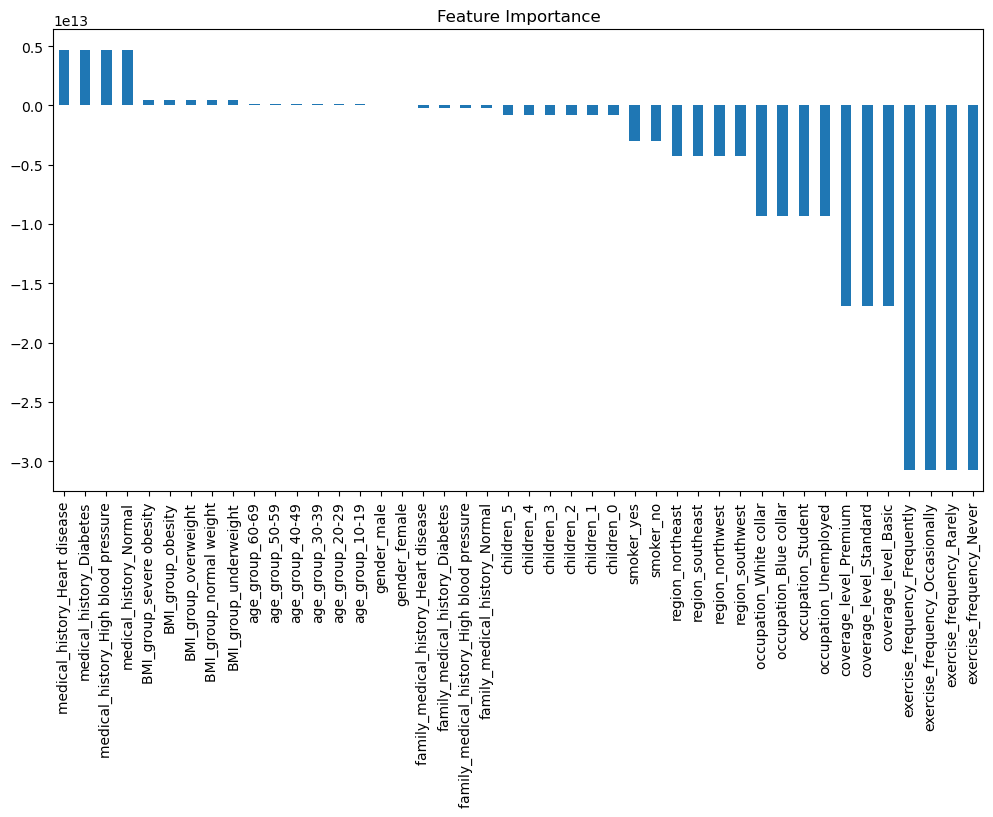

In [29]:
feature_importance = pd.Series(LR_Model.coef_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

# dropping unwanter columns

In [30]:
data.drop(['age_group', 'BMI_group', 'children', 'exercise_frequency'], axis=1, inplace=True)

In [31]:
ignore_columns = ('age_group', 'BMI group', 'charges')
data_enc_post = cate(data, ignore_columns)

In [32]:
data_enc_post = pd.get_dummies(data, columns = ['gender', 'smoker', 'region', 'medical_history', 'occupation',
       'coverage_level', 'family_medical_history'])

In [33]:
X = data_enc_post.drop('charges', axis=1)
y = data_enc_post['charges']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)

LinearRegression()

In [36]:
train_predictions = LR_Model.predict(X_train)
test_predictions = LR_Model.predict(X_test)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [37]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training R-squared: 0.9470436360070401
Test R-squared: 0.9467627297755176
Training MSE: 1034441.4969982657
Test MSE: 1033804.3332833619


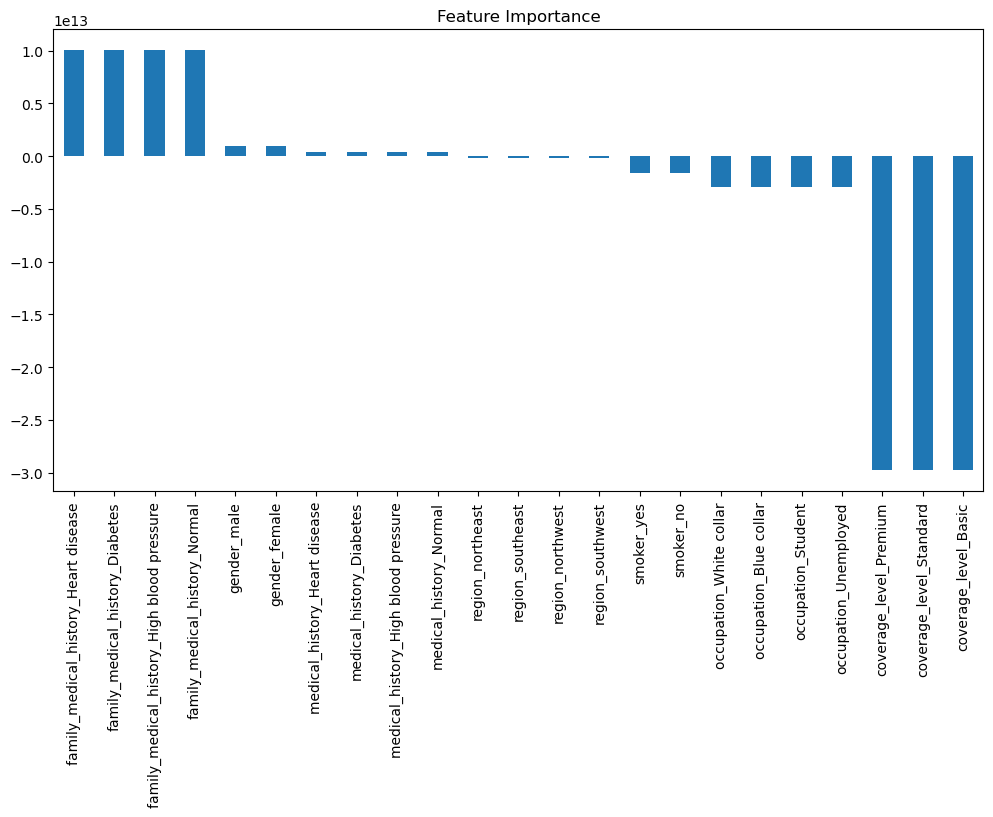

In [38]:
feature_importance = pd.Series(LR_Model.coef_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()